# Graham Scan

## 概要

仕事で平面の点群の凸包を計算する必要があった。いくつかのアルゴリズムが見つかるが、Graham Scanを実装したので内容をメモしておく。

## アルゴリズム

以下では、次のような点群の凸包をGraham Scanのアルゴリズムに従って、実際に計算してみる

In [78]:
import numpy as np
import matplotlib.pyplot as plt

### 重心を計算する

In [79]:
ps = np.array([
    [0,0],
    [1,1],
    [2,2]
])

In [80]:
def _center(ps):
    return np.mean(ps, axis=0)

In [81]:
_center(ps)

array([1., 1.])

In [82]:
ps - _center(ps)

array([[-1., -1.],
       [ 0.,  0.],
       [ 1.,  1.]])

In [83]:
ps2 = np.array([
    [1,1],
    [-1,1],
    [-1,-1],
    [1,-1],
    [0,0.5],
    [-0.5,0],
    [0,-0.5],
    [0.5,0]
])

In [84]:
def _normalize(ps):
    return (ps.T / np.linalg.norm(ps, axis=1)).T

In [85]:
_normalize(ps)

<ipython-input-84-ebf089c2bdff>:2: RuntimeWarning: invalid value encountered in true_divide
  return (ps.T / np.linalg.norm(ps, axis=1)).T


array([[       nan,        nan],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678]])

In [86]:
_normalize(ps2)

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678],
       [ 0.        ,  1.        ],
       [-1.        ,  0.        ],
       [ 0.        , -1.        ],
       [ 1.        ,  0.        ]])

In [87]:
def _angle(p):
    p2 = _normalize(p)
    ac = np.arccos(p2[:,0])
    ac[np.where(p2[:,1] < 0)] *= -1
    ac[np.where(p2[:,1] < 0)] += 2*np.pi
    return ac

In [88]:
_angle(ps)

<ipython-input-84-ebf089c2bdff>:2: RuntimeWarning: invalid value encountered in true_divide
  return (ps.T / np.linalg.norm(ps, axis=1)).T


array([       nan, 0.78539816, 0.78539816])

In [89]:
_angle(ps2)

array([0.78539816, 2.35619449, 3.92699082, 5.49778714, 1.57079633,
       3.14159265, 4.71238898, 0.        ])

In [90]:
ps2[np.argsort(_angle(ps2))]

array([[ 0.5,  0. ],
       [ 1. ,  1. ],
       [ 0. ,  0.5],
       [-1. ,  1. ],
       [-0.5,  0. ],
       [-1. , -1. ],
       [ 0. , -0.5],
       [ 1. , -1. ]])

In [91]:
def _on_left(a, b, c):
    """
    Parameters
    ----------
    a, b, c: np.ndarray of shape (1, 2).
    
    Returns
    -------
    ret: bool.
    Standing on point a, watching point b, if c is left of the line ab, returned value is True.
    """
    mat = np.ones((3,3))
    mat[:,:2] = [a,b,c]
    return np.linalg.det(mat) > 0

In [92]:
def graham_scan(ps):
    """
    Parameters
    ----------
    ps: np.ndarray of shape (n, 2)
    
    Returns
    -------
    convex hull: np.ndarray of shape (m, 2), where m <= n.
    """
    center = _center(ps)
    ps2 = ps - center
    angle = _angle(ps2)
    ps3 = ps[np.argsort(angle)]
    if len(ps) <= 3:
        return ps3
    start = 0
    p0 = ps3[0]
    n = len(ps)
    for i in range(1, n):
        cur = ps3[i]
        if cur[0] < p0[0]:
            p0 = cur
            start = i
        if cur[0] == p0[0] and cur[1] < p0[1]:
            p0 = cur
            start = i
    ps4 = np.vstack([ps3[start:], ps3[:start], [ps3[start]]])
    ret = []
    ret.append(ps4[0])
    ret.append(ps4[1])
    for p in ps4[2:]:
        ret.append(p)
        while len(ret) >= 3 and not _on_left(ret[-3], ret[-2], ret[-1]):
            ret = ret[:-2] + ret[-1:]
    return np.array(ret[:-1])

In [93]:
graham_scan(ps2)

array([[-1., -1.],
       [ 1., -1.],
       [ 1.,  1.],
       [-1.,  1.]])

In [94]:
ps3 = np.random.normal(0, 1, 100).reshape((-1,2))
gs = graham_scan(ps3)
gs

array([[-2.68798792,  0.95048832],
       [-1.95777956, -0.81446958],
       [-1.29229021, -1.66062861],
       [ 1.87075089, -1.33452904],
       [ 2.40567265,  0.66013809],
       [ 2.17553108,  2.52336695],
       [ 0.74596231,  2.47584095],
       [-0.94839541,  1.99910857]])

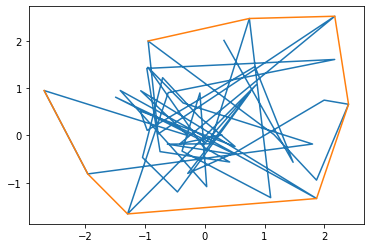

In [95]:
plt.plot(ps3[:,0], ps3[:,1])
plt.plot(gs[:,0], gs[:,1])